In [37]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn modules
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error

# Settings for better display
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")
%matplotlib inline

In [38]:
# Load the dataset
df = pd.read_csv("output/data_merged_cleaned.csv")
print(f"Dataset loaded successfully")
print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns")
print("\nFirst 5 rows:")
display(df.head())

Dataset loaded successfully
Shape: 1465 rows, 28 columns

First 5 rows:


,date,aqi_pm2.5,temp_max_c,temp_avg_c,temp_min_c,dew_point_max_c,dew_point_avg_c,dew_point_min_c,humidity_max_percent,humidity_avg_percent,humidity_min_percent,wind_speed_max_mph,wind_speed_avg_mph,wind_speed_min_mph,pressure_max_in,pressure_avg_in,pressure_min_in,month,precip_mm,temp_range,season_Autumn,season_Spring,season_Summer,season_Winter,rain_heavy,rain_light,rain_moderate,rain_none
0,01/06/2019,222.0,46.111111,38.333333,31.111111,17.777778,13.444444,3.888889,40,24.6,10,18,4.2,0,28.8,28.8,28.7,6,0.0,17.4,False,False,True,False,False,False,False,True
1,02/06/2019,170.0,46.111111,37.944444,30.000000,17.777778,16.166667,13.888889,45,28.6,16,9,5.9,0,28.9,28.8,28.7,6,0.0,16.7,False,False,True,False,False,False,False,True
2,04/06/2019,153.0,41.111111,33.388889,27.222222,22.222222,17.944444,13.888889,52,40.1,29,20,9.8,0,28.8,28.8,28.7,6,0.3,12.9,False,False,True,False,False,True,False,False
3,05/06/2019,157.0,43.888889,34.888889,27.777778,20.000000,15.833333,11.111111,55,34.1,15,15,8.3,0,28.8,28.8,28.8,6,0.0,14.9,False,False,True,False,False,False,False,True
4,06/06/2019,129.0,42.222222,35.000000,27.777778,15.000000,11.666667,8.888889,42,26.0,15,16,10.1,5,28.9,28.8,28.8,6,0.0,14.1,False,False,True,False,False,False,False,True


In [39]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Sort by date for time-based split
df_sorted = df.sort_values('date').reset_index(drop=True)

print(f"Date range: {df_sorted['date'].min().strftime('%d/%m/%Y')} to {df_sorted['date'].max().strftime('%d/%m/%Y')}")
print(f"Total days: {len(df_sorted)}")

Date range: 01/06/2019 to 29/11/2023
Total days: 1465


## **Training**

In [40]:
# Separate features (X) and target (y)
X = df_sorted.drop(columns=['aqi_pm2.5', 'date'])
y = df_sorted['aqi_pm2.5']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"\nFeature names:")
for i, col in enumerate(X.columns):
    print(f"{i:2d}. {col}")

Features shape: (1465, 26)
Target shape: (1465,)
Number of features: 26

Feature names:
 0. temp_max_c
 1. temp_avg_c
 2. temp_min_c
 3. dew_point_max_c
 4. dew_point_avg_c
 5. dew_point_min_c
 6. humidity_max_percent
 7. humidity_avg_percent
 8. humidity_min_percent
 9. wind_speed_max_mph
10. wind_speed_avg_mph
11. wind_speed_min_mph
12. pressure_max_in
13. pressure_avg_in
14. pressure_min_in
15. month
16. precip_mm
17. temp_range
18. season_Autumn
19. season_Spring
20. season_Summer
21. season_Winter
22. rain_heavy
23. rain_light
24. rain_moderate
25. rain_none


In [41]:
# Time-based split: first 80% train, last 20% test
split_idx = int(0.8 * len(df_sorted))

X_train = X.iloc[:split_idx]
X_test = X.iloc[split_idx:]
y_train = y.iloc[:split_idx]
y_test = y.iloc[split_idx:]

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Train dates: {df_sorted['date'].iloc[0].strftime('%d/%m/%Y')} to {df_sorted['date'].iloc[split_idx-1].strftime('%d/%m/%Y')}")
print(f"Test dates: {df_sorted['date'].iloc[split_idx].strftime('%d/%m/%Y')} to {df_sorted['date'].iloc[-1].strftime('%d/%m/%Y')}")

Training set: 1172 samples
Test set: 293 samples
Train dates: 01/06/2019 to 06/01/2023
Test dates: 07/01/2023 to 29/11/2023


In [42]:
# Scale features (for consistency with other models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling complete")
print(f"Scaled training shape: {X_train_scaled.shape}")
print(f"Scaled test shape: {X_test_scaled.shape}")
print(f"\nTarget statistics:")
print(f"Train - Mean: {y_train.mean():.2f}, Std: {y_train.std():.2f}")
print(f"Test  - Mean: {y_test.mean():.2f}, Std: {y_test.std():.2f}")

Feature scaling complete
Scaled training shape: (1172, 26)
Scaled test shape: (293, 26)

Target statistics:
Train - Mean: 182.53, Std: 80.09
Test  - Mean: 164.07, Std: 71.13


In [43]:
# Initialize Random Forest with default parameters
rf_basic = RandomForestRegressor(
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)

rf_basic.fit(X_train_scaled, y_train)
print("Training complete!")
print(f"Number of trees: {rf_basic.n_estimators}")

Training complete!
Number of trees: 100


## **Evaluation**

In [44]:
# Make predictions
y_pred_basic = rf_basic.predict(X_test_scaled)

# Calculate evaluation metrics
rmse_basic = root_mean_squared_error(y_test, y_pred_basic)
r2_basic = r2_score(y_test, y_pred_basic)
mae_basic = mean_absolute_error(y_test, y_pred_basic)

print("BASIC RANDOM FOREST PERFORMANCE")

print(f"RMSE: {rmse_basic:.2f}")
print(f"R² Score: {r2_basic:.4f}")
print(f"MAE: {mae_basic:.2f}")

BASIC RANDOM FOREST PERFORMANCE
RMSE: 37.72
R² Score: 0.7178
MAE: 26.84


TOP 10 MOST IMPORTANT FEATURES (Basic RF):


,feature,importance
10,wind_speed_avg_mph,0.340402
2,temp_min_c,0.133952
1,temp_avg_c,0.114087
15,month,0.077224
17,temp_range,0.053159
4,dew_point_avg_c,0.038316
7,humidity_avg_percent,0.038022
8,humidity_min_percent,0.028492
5,dew_point_min_c,0.025608
0,temp_max_c,0.022205


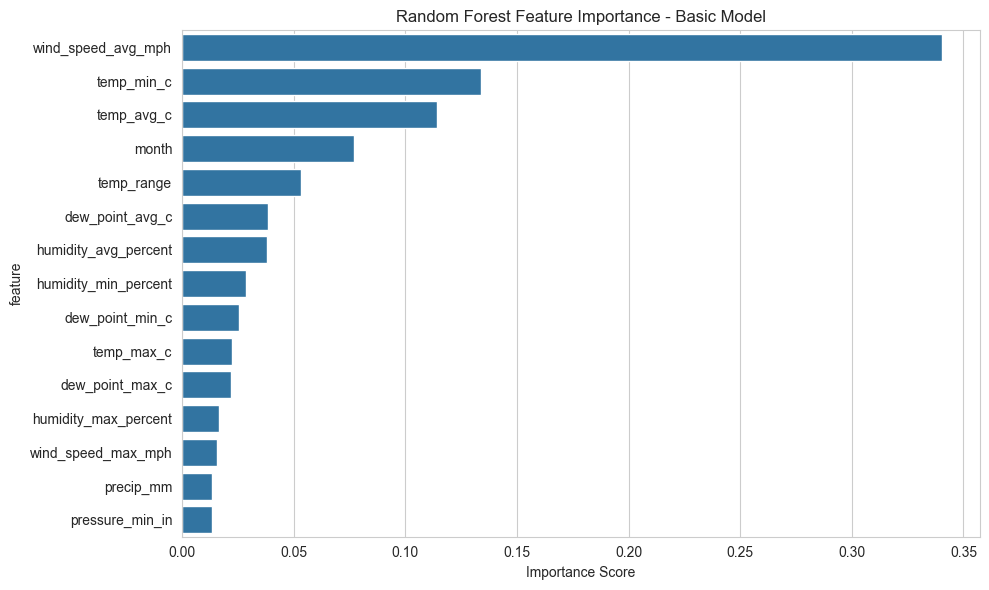

In [45]:
# Get feature importance from basic model
feature_importance_basic = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_basic.feature_importances_
}).sort_values('importance', ascending=False)

print("TOP 10 MOST IMPORTANT FEATURES (Basic RF):")
display(feature_importance_basic.head(10))

# Visualize top features
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_basic.head(15), x='importance', y='feature')
plt.title('Random Forest Feature Importance - Basic Model')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

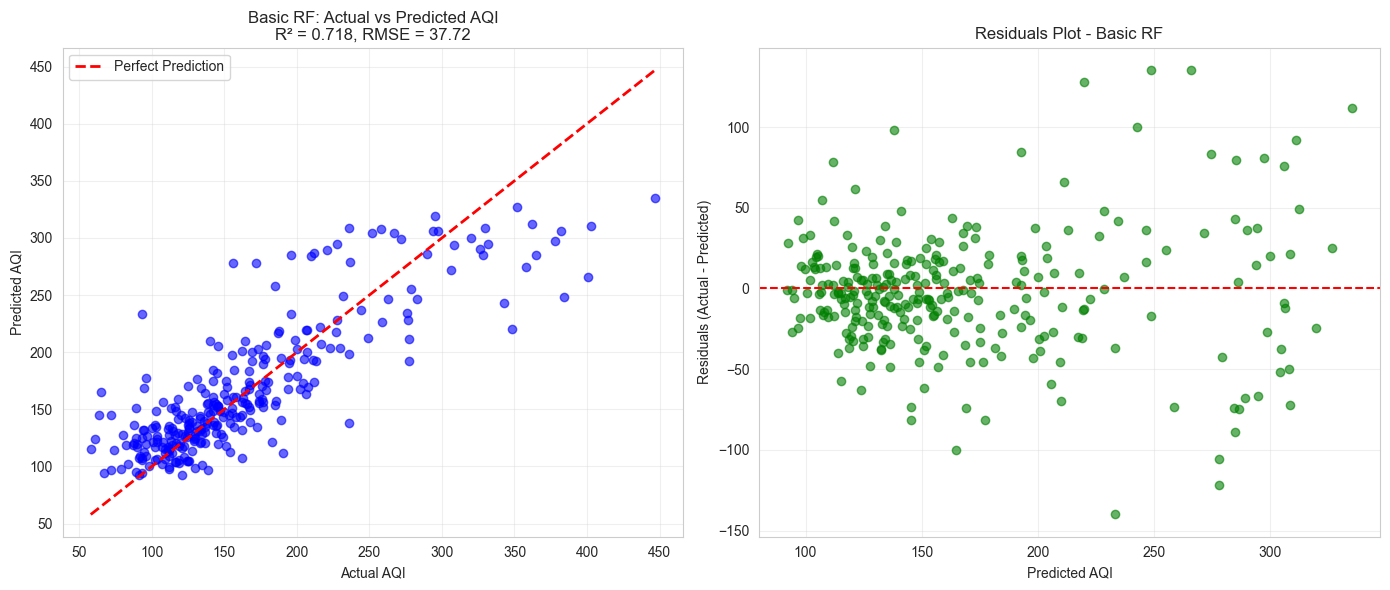

RESIDUAL ANALYSIS:
Mean residual: -2.87
Std of residuals: 37.68
Max over-prediction: -140.07 
Max under-prediction: 135.35 


In [46]:
# Create visualization figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1. Predicted vs Actual scatter plot
axes[0].scatter(y_test, y_pred_basic, alpha=0.6, color='blue')
axes[0].plot([y_test.min(), y_test.max()], 
             [y_test.min(), y_test.max()], 
             'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual AQI')
axes[0].set_ylabel('Predicted AQI')
axes[0].set_title(f'Basic RF: Actual vs Predicted AQI\nR² = {r2_basic:.3f}, RMSE = {rmse_basic:.2f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. Residuals plot
residuals_basic = y_test - y_pred_basic
axes[1].scatter(y_pred_basic, residuals_basic, alpha=0.6, color='green')
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Predicted AQI')
axes[1].set_ylabel('Residuals (Actual - Predicted)')
axes[1].set_title('Residuals Plot - Basic RF')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Residual statistics
print("RESIDUAL ANALYSIS:")
print(f"Mean residual: {residuals_basic.mean():.2f}")
print(f"Std of residuals: {residuals_basic.std():.2f}")
print(f"Max over-prediction: {residuals_basic.min():.2f} ")
print(f"Max under-prediction: {residuals_basic.max():.2f} ")

## **Hyperparameter Tuning**

In [47]:
from sklearn.model_selection import GridSearchCV
import time

# Define parameter grid optimized for time-based data
param_grid_time = {
    'n_estimators': [100, 200, 300],
    'max_depth': [15, 25, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 0.5, 0.7]
}

# Initialize Random Forest
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# Setup GridSearchCV
grid_search_time = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_time,
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

print("GRID SEARCH FOR RF")
print(f"Parameter combinations: {len(param_grid_time['n_estimators']) * len(param_grid_time['max_depth']) * len(param_grid_time['min_samples_split']) * len(param_grid_time['min_samples_leaf']) * len(param_grid_time['max_features'])}")
print()

# Fit GridSearchCV
grid_search_time.fit(X_train_scaled, y_train)

print(f"\nGridSearchCV completed ")

GRID SEARCH FOR RF
Parameter combinations: 162

Fitting 5 folds for each of 162 candidates, totalling 810 fits

GridSearchCV completed 


In [48]:
# Get best model
best_rf_time = grid_search_time.best_estimator_
best_params_time = grid_search_time.best_params_


print("GRIDSEARCHCV RESULTS")
print(f"Best Parameters: {best_params_time}")
print(f"Best CV RMSE: {-grid_search_time.best_score_:.2f}")

# Evaluate on test set
y_pred_time = best_rf_time.predict(X_test_scaled)

rmse_time = root_mean_squared_error(y_test, y_pred_time)
r2_time = r2_score(y_test, y_pred_time)

print()
print("TEST SET PERFORMANCE:")
print(f"RMSE: {rmse_time:.2f}")
print(f"R²: {r2_time:.4f}")
print()
print("IMPROVEMENT:")
print(f"RMSE Improvement: {rmse_basic - rmse_time:.2f}")
print(f"R² Improvement: {r2_time - r2_basic:.4f}")
print()

# Feature importance
feature_importance_time = pd.DataFrame({
    'feature': X.columns,
    'importance': best_rf_time.feature_importances_
}).sort_values('importance', ascending=False)

print("TOP 10 FEATURES (Tuned Model):")
display(feature_importance_time.head(10))

GRIDSEARCHCV RESULTS - TIME-BASED SPLIT
Best Parameters: {'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best CV RMSE: 52.14
TEST SET PERFORMANCE:
RMSE: 36.90
R²: 0.7300

IMPROVEMENT:
RMSE Improvement: 0.83
R² Improvement: 0.0122

TOP 10 FEATURES (Tuned Model):


,feature,importance
10,wind_speed_avg_mph,0.167103
1,temp_avg_c,0.100556
2,temp_min_c,0.097860
15,month,0.070826
4,dew_point_avg_c,0.068624
9,wind_speed_max_mph,0.055868
14,pressure_min_in,0.053625
7,humidity_avg_percent,0.041069
17,temp_range,0.037347
12,pressure_max_in,0.036223


## **Feature Engineering**

In [49]:

# Create enhanced features
X_enhanced = X.copy()

# Lag features
X_enhanced['temp_avg_lag1'] = df_sorted['temp_avg_c'].shift(1)
X_enhanced['wind_avg_lag1'] = df_sorted['wind_speed_avg_mph'].shift(1)
X_enhanced['humidity_avg_lag1'] = df_sorted['humidity_avg_percent'].shift(1)

# Interaction features
X_enhanced['wind_temp_interaction'] = X_enhanced['wind_speed_avg_mph'] * X_enhanced['temp_min_c']
X_enhanced['wind_humidity_interaction'] = X_enhanced['wind_speed_avg_mph'] * X_enhanced['humidity_avg_percent']

# High-risk indicators
X_enhanced['high_risk_month'] = X_enhanced['month'].isin([1, 2, 10, 11]).astype(int)
X_enhanced['early_winter'] = ((X_enhanced['month'] == 11) | (X_enhanced['month'] == 12)).astype(int)

# Rolling features
X_enhanced['wind_3day_avg'] = df_sorted['wind_speed_avg_mph'].rolling(3, min_periods=1).mean()
X_enhanced['temp_3day_avg'] = df_sorted['temp_avg_c'].rolling(3, min_periods=1).mean()

# Fill NaN values
X_enhanced = X_enhanced.fillna(X_enhanced.mean())

print(f"Enhanced features created: {X_enhanced.shape[1]} total features")

# Time-based split with enhanced features
split_idx = int(0.8 * len(df_sorted))
X_train_enhanced = X_enhanced.iloc[:split_idx]
X_test_enhanced = X_enhanced.iloc[split_idx:]

print(f"\nTraining with enhanced features: {X_train_enhanced.shape[0]} samples")
print(f"Testing with enhanced features: {X_test_enhanced.shape[0]} samples")

# Scale features (optional for RF, but for consistency)
scaler_enhanced = StandardScaler()
X_train_enhanced_scaled = scaler_enhanced.fit_transform(X_train_enhanced)
X_test_enhanced_scaled = scaler_enhanced.transform(X_test_enhanced)

# Train Random Forest with best parameters on enhanced features
print("\nTraining Random Forest with enhanced features:")
rf_enhanced = RandomForestRegressor(
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_enhanced.fit(X_train_enhanced_scaled, y_train)

Enhanced features created: 35 total features

Training with enhanced features: 1172 samples
Testing with enhanced features: 293 samples

Training Random Forest with enhanced features:


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## **Final Evaluation**

In [53]:
# Evaluate enhanced Random Forest
y_pred_enhanced_rf = rf_enhanced.predict(X_test_enhanced_scaled)

rmse_enhanced_rf = root_mean_squared_error(y_test, y_pred_enhanced_rf)
r2_enhanced_rf = r2_score(y_test, y_pred_enhanced_rf)

print("\nENHANCED RANDOM FOREST PERFORMANCE:")
print(f"RMSE: {rmse_enhanced_rf:.2f}")
print(f"R²: {r2_enhanced_rf:.4f}")

# Compare with original Random Forest
print("\nComparison")
print(f"{'Metric':<15} {'Enhanced RF':<15} {'Original RF':<15} {'Improvement':<10}")
print("-" * 55)
print(f"{'RMSE':<15} {rmse_enhanced_rf:<15.2f} {rmse_time:<15.2f} {rmse_time - rmse_enhanced_rf:+.2f}")
print(f"{'R²':<15} {r2_enhanced_rf:<15.4f} {r2_time:<15.4f} {r2_enhanced_rf - r2_time:+.4f}")

# Category performance analysis
print("\nENHANCED RF PERFORMANCE BY AQI CATEGORY:")

aqi_bins = [0, 100, 150, 200, 300, 500]
bin_labels = ['Good (0-100)', 'Moderate (101-150)', 'Unhealthy (151-200)', 
              'Very Unhealthy (201-300)', 'Hazardous (301-500)']

y_test_binned = pd.cut(y_test, bins=aqi_bins, labels=bin_labels)

print(f"{'Category':<25} {'Samples':<10} {'RMSE':<12} {'Bias':<12}")
print("-" * 60)

for category in bin_labels:
    mask = y_test_binned == category
    if mask.sum() > 0:
        category_rmse = root_mean_squared_error(y_test[mask], y_pred_enhanced_rf[mask])
        category_bias = (y_test[mask] - y_pred_enhanced_rf[mask]).mean()
        print(f"{category:<25} {mask.sum():<10} {category_rmse:<12.2f} {category_bias:<12.2f}")



ENHANCED RANDOM FOREST PERFORMANCE:
RMSE: 33.94
R²: 0.7716

Comparison
Metric          Enhanced RF     Original RF     Improvement
-------------------------------------------------------
RMSE            33.94           36.90           +2.96
R²              0.7716          0.7300          +0.0416

ENHANCED RF PERFORMANCE BY AQI CATEGORY:
Category                  Samples    RMSE         Bias        
------------------------------------------------------------
Good (0-100)              38         44.12        -36.25      
Moderate (101-150)        121        19.33        -6.51       
Unhealthy (151-200)       70         30.06        2.23        
Very Unhealthy (201-300)  45         38.17        3.14        
Hazardous (301-500)       19         68.62        58.51       


In [54]:
# Compare with XGBoost
print("\nCOMPARISON WITH XGBOOST:")
print(f"Enhanced Random Forest RMSE: {rmse_enhanced_rf:.2f}")
print(f"Enhanced XGBoost RMSE: 33.69")
print(f"Difference: {rmse_enhanced_rf - 33.69:.2f} RMSE points")


# Hazardous days specific analysis
hazardous_mask = y_test > 300
if hazardous_mask.sum() > 0:
    rf_enhanced_hazardous_rmse = root_mean_squared_error(y_test[hazardous_mask], y_pred_enhanced_rf[hazardous_mask])
    print(f"\nEnhanced RF Hazardous Days RMSE: {rf_enhanced_hazardous_rmse:.2f}")
    print(f"XGBoost Hazardous RMSE: 57.83")
    print(f"Difference: {rf_enhanced_hazardous_rmse - 57.83:.2f} RMSE points")



COMPARISON WITH XGBOOST:
Enhanced Random Forest RMSE: 33.94
Enhanced XGBoost RMSE: 33.69
Difference: 0.25 RMSE points

Enhanced RF Hazardous Days RMSE: 68.62
XGBoost Hazardous RMSE: 57.83
Difference: 10.79 RMSE points


In [51]:

# Feature importance for enhanced RF
feature_importance_enhanced_rf = pd.DataFrame({
    'feature': X_enhanced.columns,
    'importance': rf_enhanced.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTOP 10 FEATURES - ENHANCED RANDOM FOREST:")
display(feature_importance_enhanced_rf.head(10))

# Check which new features are important
new_features = set(X_enhanced.columns) - set(X.columns)
top_new_features = [f for f in feature_importance_enhanced_rf.head(10)['feature'] if f in new_features]

if top_new_features:
    print(f"\nNew enhanced features in top 10: {', '.join(top_new_features)}")
else:
    print()


TOP 10 FEATURES - ENHANCED RANDOM FOREST:


,feature,importance
29,wind_temp_interaction,0.122077
33,wind_3day_avg,0.098408
27,wind_avg_lag1,0.065669
34,temp_3day_avg,0.064528
10,wind_speed_avg_mph,0.059936
1,temp_avg_c,0.050734
26,temp_avg_lag1,0.044613
2,temp_min_c,0.044416
30,wind_humidity_interaction,0.044303
15,month,0.037358



New enhanced features in top 10: wind_temp_interaction, wind_3day_avg, wind_avg_lag1, temp_3day_avg, temp_avg_lag1, wind_humidity_interaction


## **Saving the Model**

In [52]:
import joblib
# Save Random Forest model
rf_model_data = {
    'model': best_rf_time,  
    'scaler_X': scaler,  
    'feature_names': X.columns.tolist()
}

joblib.dump(rf_model_data, 'output/models/rf_model.pkl')
print("Random Forest model saved to output/models/rf_model.pkl")

Random Forest model saved to output/models/rf_model.pkl
